## Company description
XYZ Auctions is an innovative digital platform committed to bringing exciting auctions to the fingertips of collectors and enthusiasts around the globe. Specializing in sports cards, comics, and other highly sought-after collectibles, we leverage the power of technology to deliver a seamless and engaging auction experience to our users. Our mobile app connects sellers with a broad audience of potential buyers, driving competition, and ensuring items reach their true market value. As a trusted marketplace, we pride ourselves on our commitment to authenticity, transparency, and outstanding customer service.

## Project desctiption
A/B testing for mobile push notifications, with the aim of determining the most effective timimg to encourage participation in auctions.

## Data description
The dataset is given in the file ```push_data.csv```. The dataset provides information on the total number of users who recieved push notifications. Here's a description of each column:
- `uid` : A unique identifier for each user
- `log_date` : A first date when the log was made once the push notification has been sent to the user
- `time` : The time when the log was created (time zone GMT-7), the values are significantly rounded for clarity and ease of data manipulation
- `device` : The type of device used by the user, such as Android or iOS
- `browser` : The browser used by the user, such as Chrome or Safari
- `push_notification` : The push notifications into types 'A' and 'B', likely used for A/B testing.
- `bid_day` : Represents the day of a scheduled bid (`1st - Mar 2`, `2nd - Mar 10`, `3rd - Mar 25`)
- `country` : The country of the user
- `state` : The state where the user is based (limited to 3 states only to monitor users within one timezone)
- `bidded` : The user participated in auction

## Encouraging participation in auctions can have several benefits, such as:
- Increased Competition: More bidders can lead to higher competition, which can potentially drive up the final auction prices. This can lead to higher revenue for both the company and the seller of the item.
- Greater Product Exposure: More participants means more people viewing the products. Even if they don't win the auction, they might become interested in other items or future auctions.
- Customer Engagement: Participating in an auction can increase user engagement with the app and the brand. This can lead to higher user retention and loyalty, which can have long-term benefits for the business.
- Market Insights: With more people participating, we can gather more data about customer preferences and behaviors. This can help refine the product offering and marketing strategy, and potentially identify new opportunities.
- User Acquisition: If users find the auctions exciting and competitive, they may invite friends or share their experiences on social media, helping to attract new users to the platform.
- Profit Maximization: Auctions often result in the sale of a product at the highest possible price that buyers are willing to pay. More participation can enhance this effect, maximizing profitability for sellers and revenue for the platform.

## Assignment
Here's how we can run the A/B test,randomly assign users into two groups:
- The first group, the control group, will continue receiving notifications 15 minutes prior to the start of an auction.
- The second group, the experimental group, will receive notifications 5 minutes prior to the start of an auction.

In this case, the metric is the participation ratio, which is presumably the number of users who participate in the auction divided by the total number of users who received the notification.

## KPIs defenition
At this stage we are not interested in success rate, we'll be more focused on bid participation.
That's why we choose the following main and proxy metrics:
- `Bids Initiated Ratio (BIR)`: The total number of bids (successful or not) initiated divided by the total number of push notifications received. This measures the overall engagement in bidding activity driven by your push notifications, irrespective of the outcome.
- `Click-Through Rate (CTR)`: The number of times a notification is opened or clicked on divided by the total number of notifications sent. This is a useful metric to measure the initial level of engagement with your push notifications, and it can often be a good predictor of downstream actions like bidding.


## Auctions schedule
- `March 2, 2022`, `8:15`
- `March 10, 2022`, `9:30`
- `March 25, 2022`, `14:40`

## Exploratory data analysis
In this part, we'll conduct an exploratory data analysis. The primary objective of this phase is to gain familiarity with the dataset, extract descriptive statistics, and gather insights about both the data set and user data.

In [1]:
# Importing pandas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportion_confint

#importing file with data
importing data
push_df = pd.read_csv('push_data.csv')


<Axes: >

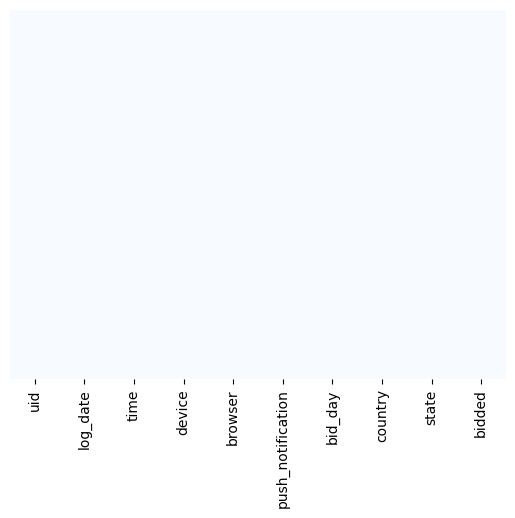

In [4]:
# check if there are any Null values
sns.heatmap(push_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [5]:
push_df.shape

(10000, 10)

In [6]:
push_df.head()

,uid,log_date,time,device,browser,push_notification,bid_day,country,state,bidded
0,54030035.0,"March 2, 2022",8:00,Android,Chrome,A,1,USA,UTAH,True
1,72574201.0,"March 2, 2022",8:10,iOS,Safari,B,1,USA,COLORADO,True
2,64187558.0,"March 2, 2022",8:00,iOS,Chrome,A,1,USA,ARIZONA,True
3,92513925.0,"March 2, 2022",8:10,Android,Chrome,B,1,USA,UTAH,True
4,99231338.0,"March 2, 2022",8:10,iOS,Chrome,B,1,USA,COLORADO,True


In [7]:
push_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uid                10000 non-null  float64
 1   log_date           10000 non-null  object 
 2   time               10000 non-null  object 
 3   device             10000 non-null  object 
 4   browser            10000 non-null  object 
 5   push_notification  10000 non-null  object 
 6   bid_day            10000 non-null  int64  
 7   country            10000 non-null  object 
 8   state              10000 non-null  object 
 9   bidded             10000 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 713.0+ KB


>Gives us us the understanding the basic information about  dataset such as the number of records & the type of variables.

In [8]:
#Summarize categorical data
print("Device types:")
print(push_df["device"].value_counts())
print("")
print("Browser types:")
print(push_df["browser"].value_counts())
print("")
print("States:")
print(push_df["state"].value_counts())
print("")
print("User participated in auction:")
print(push_df["bidded"].value_counts())

Device types:
Android    5810
iOS        4190
Name: device, dtype: int64

Browser types:
Chrome    9595
Safari     405
Name: browser, dtype: int64

States:
UTAH        3334
COLORADO    3333
ARIZONA     3333
Name: state, dtype: int64

User participated in auction:
False    7536
True     2464
Name: bidded, dtype: int64


In [9]:
# Checking if there any correlations between columns
push_df.corr()

<ipython-input-9-7166d2d5f11e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  push_df.corr()


,uid,bid_day,bidded
uid,1.000000,-0.017118,0.009576
bid_day,-0.017118,1.000000,-0.001489
bidded,0.009576,-0.001489,1.000000


<ipython-input-10-0359f6ae2935>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = push_df.corr()


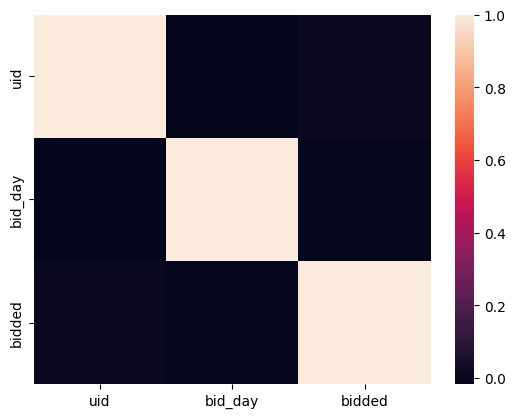

In [10]:
corr = push_df.corr()
# Creating a heatmap
sns.heatmap(corr)
# Showing the plot
plt.show()

> As we can see, there is no any useful correlation detected



<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


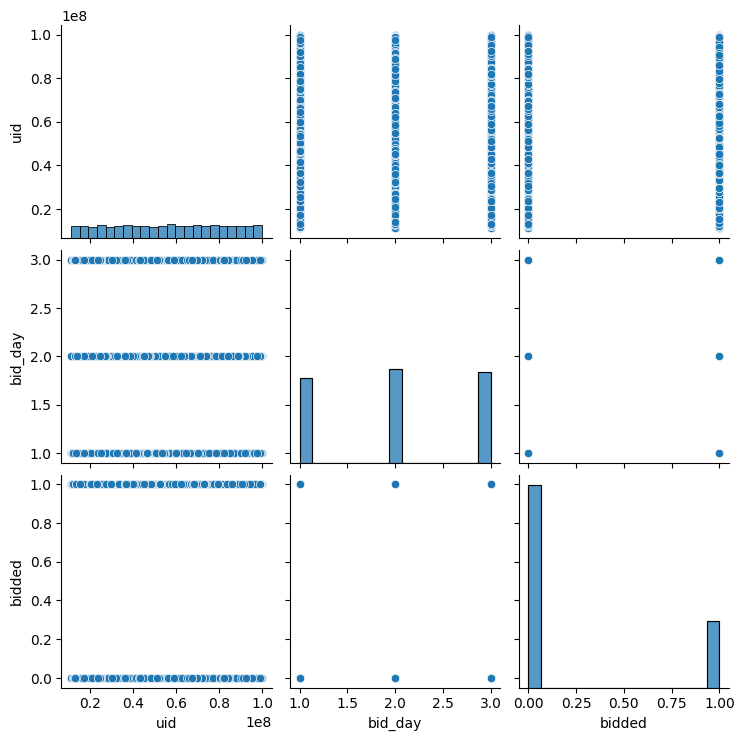

In [11]:
# plot pairplot
sns.pairplot(push_df)

## Experiment Design and Planning

## Goal:
Increase the number of users participating in scheduled auctions.
## Hypothesis:
If we send push notifications closer to the start time of the scheduled auctions (5 mins before start), then more users will participate in these auctions.

*   Null Hypothesis (H0): The optimal time to send push notifications before an auction is 15 minutes.
*   Alternative Hypothesis (H1): The optimal time to send push notifications before an auction is 5 minutes.

## Versions:
*   Version A (Control): Push notifications are sent 15 minutes before the auction starts.
*   Version B (Test): Push notifications are sent 5 minutes before the auction starts.

## Randomization
In an effort to determine the optimal timing for push notifications for our scheduled auctions, we conducted an A/B test with a total of 10,000 users. The users were randomly selected from our active user base, ensuring an unbiased sample.
The users were then randomly assigned to two groups, each comprising 5,000 users. The first group, Group A, served as our control group. Users in this group received push notifications 15 minutes before the start of an auction, consistent with our current standard practice.
The second group, Group B, served as our test group. These users received push notifications 5 minutes before the start of an auction. This change represented our experimental variable, designed to test our hypothesis that sending notifications closer to the start of an auction would increase participation rates.
Throughout the testing period, we closely monitored user participation in our scheduled auctions, gathering data to compare the effectiveness of the two different notification timings. Our analysis of this data will allow us to determine which notification timing leads to greater user participation in our scheduled auctions.

## Outcomes:
- `Bids Initiated Ratio`: Total number of bids/Push recieved
- `CTR`: Total number of opens / Push recieved

## The rates before we run the test
>Baseline:
- `BIR`: 0.21
- `CTR`: 0.3722

>Confidence level = 0.95

>Desired power = 0.80

Note on sample size: for the the pet-project we won't count a sample size, and we'll have 10K users for test.

## Results analysis

In [14]:
#Checking that our groups are the same size
test_results = push_df.groupby(by = ['push_notification'], as_index=False)


In [15]:
#Checking demographics
test_results = push_df.groupby(by = ['state','push_notification'], as_index=False)
test_results.uid.count()

,state,push_notification,uid
0,ARIZONA,A,1665
1,ARIZONA,B,1668
2,COLORADO,A,1668
3,COLORADO,B,1665
4,UTAH,A,1666
5,UTAH,B,1668


##Test vs control group

In [17]:
#CTR: Total number of logins / Push recieved
#CTR for A
# Combining the 'log_date' and 'time' columns into a single datetime column
push_df['datetime'] = pd.to_datetime(push_df['log_date'] + ' ' + push_df['time'])

# Filter rows for a specific date and time
filtered_df_A = push_df[(push_df['datetime'] == '2022-03-02 08:00:00') | (push_df['datetime'] == '2022-03-10 09:15:00')|(push_df['datetime'] == '2022-03-25 14:25:00')]

ctr_A = filtered_df_A.shape[0]/5000

ctr_A

0.3632

In [18]:
#CTR for B

# Filter rows for a specific date and time
filtered_df_B = push_df[(push_df['datetime'] == '2022-03-02 08:10:00') | (push_df['datetime'] == '2022-03-10 09:25:00')|(push_df['datetime'] == '2022-03-25 14:35:00')]

ctr_B = filtered_df_B.shape[0]/5000
ctr_B


0.6674

In [19]:
#Bids Initiated Ratio: Total number of bids/Push recieved
#bir_A
# Filter bids for group A
bids_A = push_df[(push_df['push_notification'] == 'A') & (push_df['bidded'] == True)]
total_bids_A = bids_A.shape[0]
bir_A = total_bids_A/5000
bir_A

0.204

In [20]:
#bir_B
# Filter bids for group B
bids_B = push_df[(push_df['push_notification'] == 'B') & (push_df['bidded'] == True)]
total_bids_B = bids_B.shape[0]
bir_B = total_bids_B/5000
bir_B

0.2888

 ## Checking if the result is statisctically significant
 Since we are discussing an A/B test scenario with two groups (A and B) and we're interested in whether there's a significant difference between the proportions of users who participated in the auctions from these groups, we could use a two-proportion z-test.

In [21]:
#But let's check CTR, as this metric is a bit more sensitive.
# count: the number of successes (users who participated) in each group
count = np.array([filtered_df_A.uid.count()  , filtered_df_B.uid.count() ])

# nobs: the number of observations (total users) in each group
nobs = np.array([5000, 5000])

# Perform the two-proportion z-test
z_stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')
z_stat, p_value

(-30.434252045165106, 1.9357373896023113e-203)

The provided values are again the z-score and the p-value. The z-score of -30.4343 is very large in magnitude, suggesting a significant difference between the two groups, and the p-value is extremely small (essentially zero), much smaller than the standard threshold of 0.05.

Given that group A is the 15-minute notification group and group B is the 5-minute notification group, a negative z-score indicates that group B (the 5-minute notification group) performs significantly better on this metric than group A (the 15-minute notification group).

In [22]:
# count: the number of successes (users who participated) in each group
count = np.array([total_bids_A, total_bids_B])

# nobs: the number of observations (total users) in each group
nobs = np.array([5000, 5000])

# Perform the two-proportion z-test
z_stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')
z_stat, p_value

(-9.839545989932812, 7.605326137715742e-23)

Given this arrangement, z-score and p-value suggest a significant difference in user participation between the two groups. More specifically, the negative z-score indicates that group B (5-minute notification group) has a significantly higher participation rate than group A (15-minute notification group).

The extremely small p-value (7.61e-23) is much less than 0.05, the common threshold for significance in such tests. This leads us to reject the null hypothesis (which states that there's no difference in participation between notifications sent 15 minutes and 5 minutes before auction).

In conclusion, A/B test results provide strong statistical evidence that sending push notifications 5 minutes before the start of an auction results in a higher participation rate compared to sending them 15 minutes before the start.

In [23]:

# Calculate confidence interval for group A
conf_int_A = proportion_confint(total_bids_A, 5000, alpha=0.05)

# Calculate confidence interval for group B
conf_int_B = proportion_confint(total_bids_B, 5000, alpha=0.05)

# Print confidence intervals
print('Confidence interval for group A:', conf_int_A)
print('Confidence interval for group B:', conf_int_B)

Confidence interval for group A: (0.19283047495065617, 0.2151695250493438)
Confidence interval for group B: (0.276238035629452, 0.301361964370548)


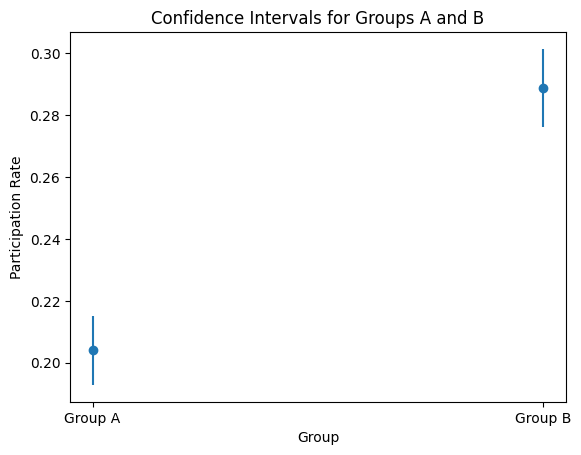

In [24]:
import matplotlib.pyplot as plt

# Names of groups
groups = ['Group A', 'Group B']

# Point estimates - the midpoint of each confidence interval
estimates = [(0.19283047495065617 + 0.2151695250493438) / 2,
             (0.276238035629452 + 0.301361964370548) / 2]

# Confidence intervals - the range of each confidence interval
cis = [(0.2151695250493438 - 0.19283047495065617) / 2,
       (0.301361964370548 - 0.276238035629452) / 2]

plt.errorbar(groups, estimates, yerr=cis, fmt='o')
plt.title('Confidence Intervals for Groups A and B')
plt.xlabel('Group')
plt.ylabel('Participation Rate')
plt.show()


The confidence intervals for groups A and B suggest that there is indeed a significant difference between the two groups. The 95% confidence interval for the participation rate of group A (15-minute notifications) is approximately 0.193 to 0.215, and for group B (5-minute notifications) it's approximately 0.276 to 0.301.

Since the confidence intervals for groups A and B do not overlap, this provides further evidence that the difference in participation rates between the two groups is statistically significant.

## Recommendations:

Taking into account this isolated experiment conducted for a pet-project, and based on the statistical results obtained, my recommendation is to change the push notification time to 5 minutes before the start of the auction.

However, there are several other areas that could be explored in future studies to optimize user participation in the auctions. These include:

- Extending the experiment to include a broader range of locations and time zones. This could help us understand if the optimal notification timing varies based on geographical location or cultural differences.

- Investigating if there is any correlation between the date (or day of the week) and the participation rate. This could provide insights into whether certain days are more effective for auctions than others.

- Considering the addition of other notification options aside from push notifications. For instance, offering users the option to add a reminder to their calendar might give them more control over when they're notified. Alternatively, the feature could be added directly to the app, allowing for in-app reminders.

By exploring these additional factors, we could potentially develop an even more effective strategy for increasing user participation in our scheduled auctions.